## Import Data into Python Using Pandas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import date
import random
sns.set()
sns.reset_orig()
%matplotlib inline
SMALL_SIZE = 12
MEDIUM_SIZE = 15
BIGGER_SIZE = 22

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
calldata = pd.read_csv('party_in_nyc.csv')

## Create Columns for Month, Day, and Time 
### Time is a tuple of (Hour, Minute, Second)

In [2]:
# Create time column

def getTime(created):
    time = (created.split()[-1])
    time = time.split(sep=':')
    time = tuple(time)
    return time

def getMonth(created):
    month = (created.split()[0])
    month = month.split(sep = '-')
    month = int(month[1])
    return month

def getDay(created):
    day = (created.split()[0])
    day = day.split(sep = '-')
    day = int(day[-1])
    return day

created_series = calldata.iloc[:,0]
month_series = created_series.apply(getMonth)
day_series = created_series.apply(getDay)
time_series = created_series.apply(getTime)

calldata = calldata.assign(Month=month_series.values)
calldata = calldata.assign(Day=day_series.values)
calldata = calldata.assign(Time=time_series.values)

#calldata.head()

In [3]:
# add weekday column
def getYear(created):
    year = (created.split()[0])
    year = year.split(sep = '-')
    year = int(year[0])
    return year

def getWeekday(created):
    day = getDay(created)
    month = getMonth(created)
    year = getYear(created)
    newDate = date(int(year), int(month), int(day))
    newDate = newDate.weekday()
    if newDate == 0:
        newDate = 'Monday'
    elif newDate == 1:
        newDate = 'Tuesday'
    elif newDate == 2:
        newDate = 'Wednesday'
    elif newDate == 3:
        newDate = 'Thursday'
    elif newDate == 4:
        newDate = 'Friday'
    elif newDate == 5:
        newDate = 'Saturday'
    elif newDate == 6:
        newDate = 'Sunday'
    else:
        newDate = 'Wrong'
    return newDate

# returns weekday as int, starting with 0 as monday
def getWeekdayInt(created):
    day = getDay(created)
    month = getMonth(created)
    year = getYear(created)
    newDate = date(int(year), int(month), int(day))
    newDate = newDate.weekday()
    return newDate


In [4]:
created_series = calldata.iloc[:,0]
weekday_series = created_series.apply(getWeekday)
weekday_int_series = created_series.apply(getWeekdayInt)

calldata = calldata.assign(Weekday = weekday_series.values)
calldata = calldata.assign(WeekdayInt = weekday_int_series.values)
#calldata.head()

In [5]:
#Bailey Stuff

#Graph the density of calls to location type to hours in the day


#created_series = calldata.iloc[:,0]
#month_series = created_series.apply(getMonth)
#day_series = created_series.apply(getDay)
#time_series = created_series.apply(getTime)

#calldata = calldata.assign(Month=month_series.values)
#calldata = calldata.assign(Day=day_series.values)
#calldata = calldata.assign(Time=time_series.values)
#def getDay(created):
 #   day = (created.split()[0])
 #   day = day.split(sep = '-')
 #   day = day[-1]
 #   return day

def getHour(time):
    hour = int(time[0])
    return hour

hour_series = time_series.apply(getHour)

calldata = calldata.assign(Hour=hour_series)
calldata.head()

#make histogram for all location types vs hours, each location type vs hours. City vs. hour, borough vs hour
store = calldata.loc[calldata['Location Type'] == 'Store/Commercial']
house = calldata.loc[calldata['Location Type'] == 'Residential Building/House']
club = calldata.loc[calldata['Location Type'] == 'Club/Bar/Restaurant']
street = calldata.loc[calldata['Location Type'] == 'Street/Sidewalk']
park = calldata.loc[calldata['Location Type'] == 'Park/Playground']
church = calldata.loc[calldata['Location Type'] == 'House of Worship']

man = calldata.loc[calldata['Borough'] == 'MANHATTAN']
bro = calldata.loc[calldata['Borough'] == 'BROOKLYN']
brx = calldata.loc[calldata['Borough'] == 'BRONX']
que = calldata.loc[calldata['Borough'] == 'QUEENS']
sta = calldata.loc[calldata['Borough'] == 'STATEN ISLAND']
uns = calldata.loc[calldata['Borough'] == 'Unspecified']

In [6]:
#Locations of parties over the year( by month, by day)

def getYearDay(date):
    day = getDay(date)
    month = getMonth(date)
    if month == 1:
        yearday = day
    elif month == 2:
        yearday = 31 + day
    elif month == 3:
        yearday = 60 + day
    elif month == 4:
        yearday = 91 + day
    elif month == 5:
        yearday = 121 + day
    elif month == 6:
        yearday = 152 + day
    elif month == 7:
        yearday = 182 + day
    elif month == 8:
        yearday = 213 + day
    elif month == 9:
        yearday = 244 + day
    elif month == 10:
        yearday = 274 + day
    elif month == 11:
        yearday = 305 + day
    elif month == 12:
        yearday = 335 + day
    return yearday

created_series = calldata.iloc[:,0]
yearday_series = created_series.apply(getYearDay)
calldata = calldata.assign(YearDay=yearday_series.values)

In [7]:
calldata.info()
calldata.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225414 entries, 0 to 225413
Data columns (total 15 columns):
Created Date     225414 non-null object
Closed Date      224619 non-null object
Location Type    225414 non-null object
Incident Zip     224424 non-null float64
City             224424 non-null object
Borough          225414 non-null object
Latitude         223946 non-null float64
Longitude        223946 non-null float64
Month            225414 non-null int64
Day              225414 non-null int64
Time             225414 non-null object
Weekday          225414 non-null object
WeekdayInt       225414 non-null int64
Hour             225414 non-null int64
YearDay          225414 non-null int64
dtypes: float64(3), int64(5), object(7)
memory usage: 25.8+ MB


,Created Date,Closed Date,Location Type,Incident Zip,City,Borough,Latitude,Longitude,Month,Day,Time,Weekday,WeekdayInt,Hour,YearDay
0,2015-12-31 00:01:15,2015-12-31 03:48:04,Store/Commercial,10034.0,NEW YORK,MANHATTAN,40.866183,-73.918930,12,31,"(00, 01, 15)",Thursday,3,0,366
1,2015-12-31 00:02:48,2015-12-31 04:36:13,Store/Commercial,10040.0,NEW YORK,MANHATTAN,40.859324,-73.931237,12,31,"(00, 02, 48)",Thursday,3,0,366
2,2015-12-31 00:03:25,2015-12-31 00:40:15,Residential Building/House,10026.0,NEW YORK,MANHATTAN,40.799415,-73.953371,12,31,"(00, 03, 25)",Thursday,3,0,366
3,2015-12-31 00:03:26,2015-12-31 01:53:38,Residential Building/House,11231.0,BROOKLYN,BROOKLYN,40.678285,-73.994668,12,31,"(00, 03, 26)",Thursday,3,0,366
4,2015-12-31 00:05:10,2015-12-31 03:49:10,Residential Building/House,10033.0,NEW YORK,MANHATTAN,40.850304,-73.938516,12,31,"(00, 05, 10)",Thursday,3,0,366


## Plot All Calls by Party Type

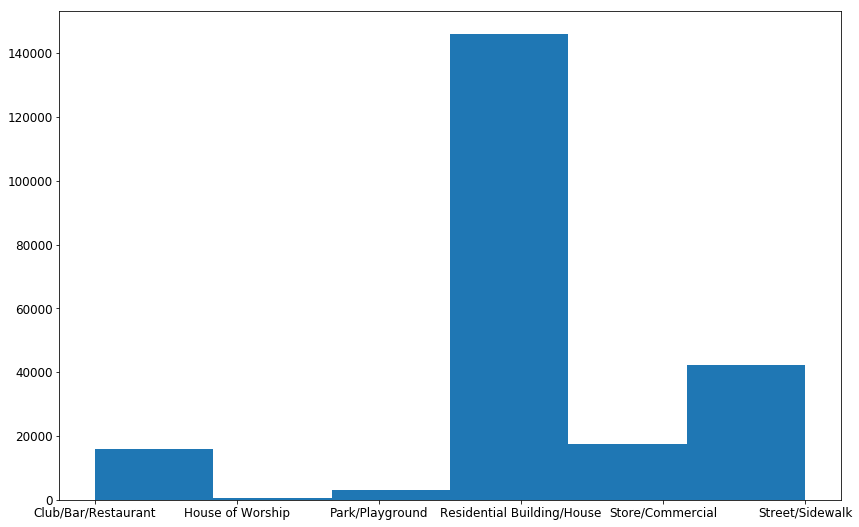

In [8]:
plt.rcParams["figure.figsize"] = [14, 9] 
plt.hist(calldata['Location Type'],6)

resdata = calldata.loc[calldata['Location Type'] == 'Residential Building/House']
plt.show()

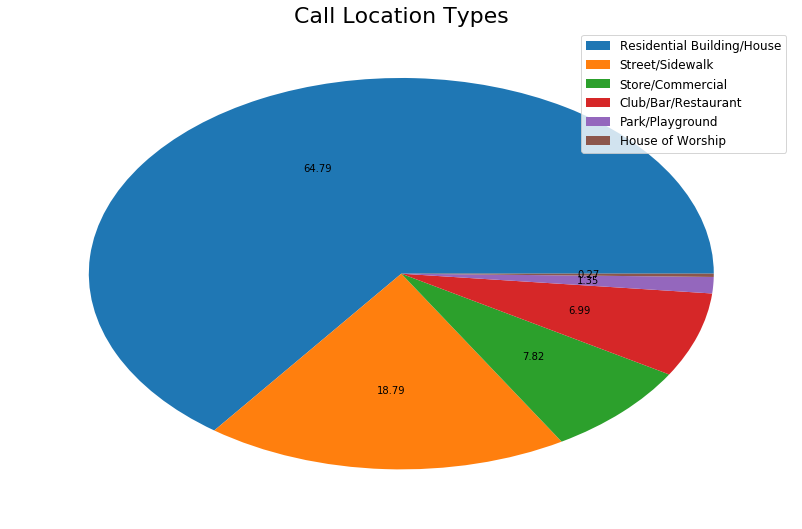

In [9]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)
counts = calldata['Location Type'].value_counts()

ax1.pie(counts, autopct='%.2f')
ax1.legend( labels=counts.keys())
ax1.set_title('Call Location Types')
plt.show()

## All Calls by Time of Day (Hourly)

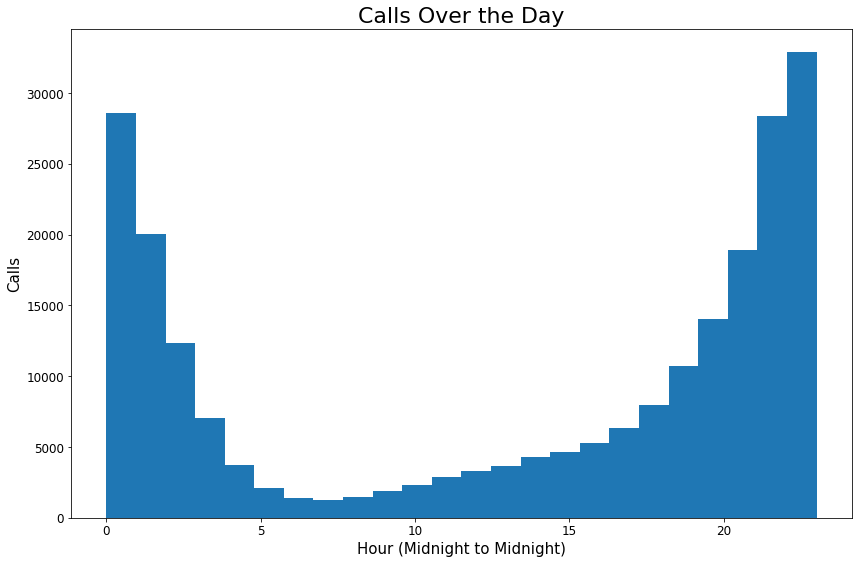

In [10]:
plt.hist(calldata['Hour'],24)

plt.xlabel('Hour (Midnight to Midnight)')
plt.ylabel('Calls')
plt.title('Calls Over the Day')
plt.show()

## Party Type Calls by Time of Day (Hour)

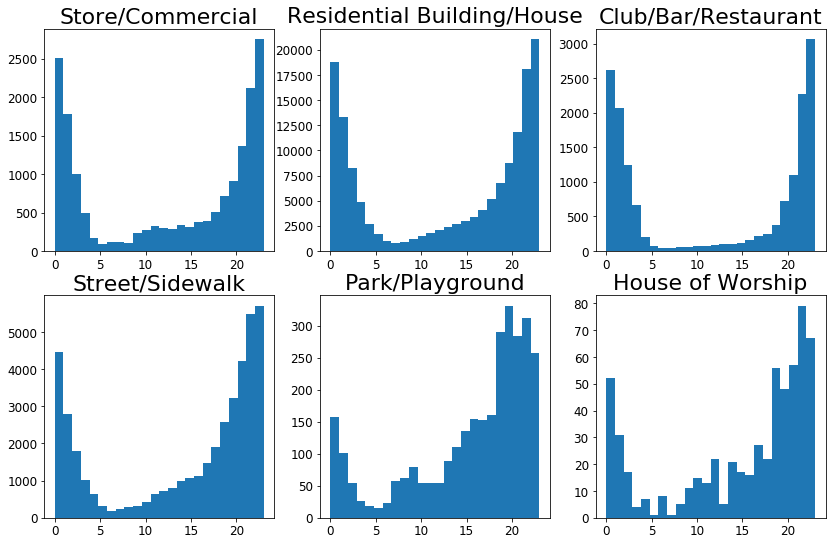

In [11]:
fig = plt.figure()

ax1 = fig.add_subplot(2, 3, 1)
ax1.hist(store['Hour'],24)
ax1.set_title('Store/Commercial')
ax2 = fig.add_subplot(2, 3, 2)
ax2.hist(house['Hour'],24)
ax2.set_title('Residential Building/House')
ax3 = fig.add_subplot(2, 3, 3)
ax3.hist(club['Hour'],24)
ax3.set_title('Club/Bar/Restaurant')
ax4 = fig.add_subplot(2, 3, 4)
ax4.hist(street['Hour'],24)
ax4.set_title('Street/Sidewalk')
ax5 = fig.add_subplot(2, 3, 5)
ax5.hist(park['Hour'],24)
ax5.set_title('Park/Playground')
ax6 = fig.add_subplot(2, 3, 6)
ax6.hist(church['Hour'],24)
ax6.set_title('House of Worship')

plt.show()

## Borough Calls by Time of Day (Hour)

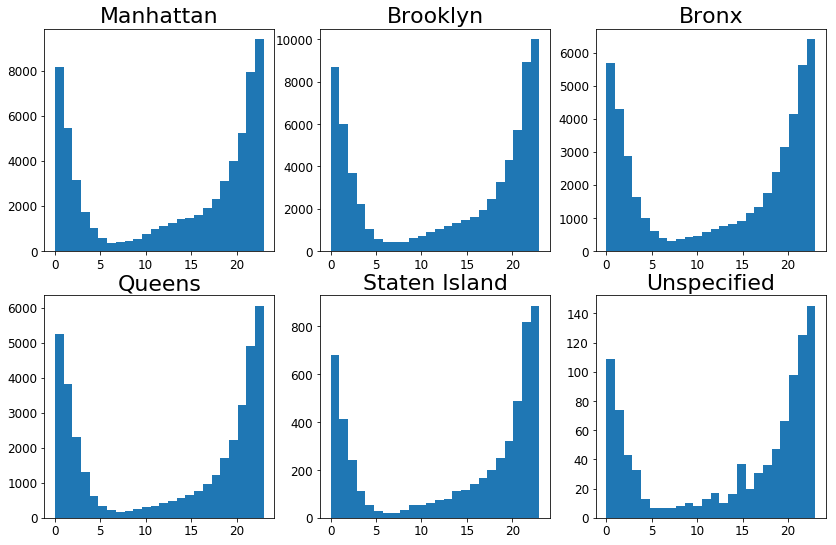

In [12]:
fig = plt.figure()

ax1 = fig.add_subplot(2, 3, 1)
ax1.hist(man['Hour'],24)
ax1.set_title('Manhattan')
ax2 = fig.add_subplot(2, 3, 2)
ax2.hist(bro['Hour'],24)
ax2.set_title('Brooklyn')
ax3 = fig.add_subplot(2, 3, 3)
ax3.hist(brx['Hour'],24)
ax3.set_title('Bronx')
ax4 = fig.add_subplot(2, 3, 4)
ax4.hist(que['Hour'],24)
ax4.set_title('Queens')
ax5 = fig.add_subplot(2, 3, 5)
ax5.hist(sta['Hour'],24)
ax5.set_title('Staten Island')
ax6 = fig.add_subplot(2, 3, 6)
ax6.hist(uns['Hour'],24)
ax6.set_title('Unspecified')

plt.show()

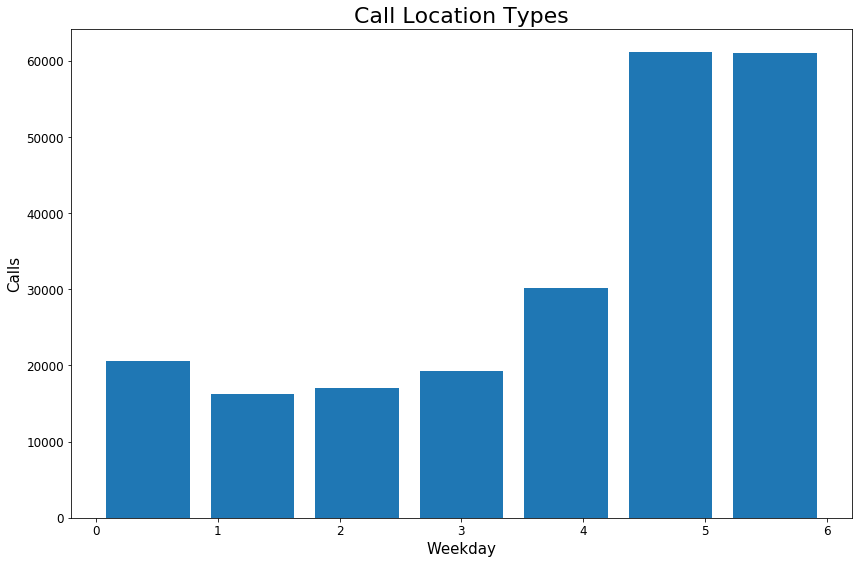

In [13]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)
#names = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
ax1.hist(calldata['WeekdayInt'],bins = 7, rwidth = 0.8)
ax1.set_xlabel('Weekday')
ax1.set_ylabel('Calls')
ax1.set_title('Call Location Types')
#ax1.set_xticklabels(names,rotation=45, rotation_mode="anchor", ha="right")
plt.show()

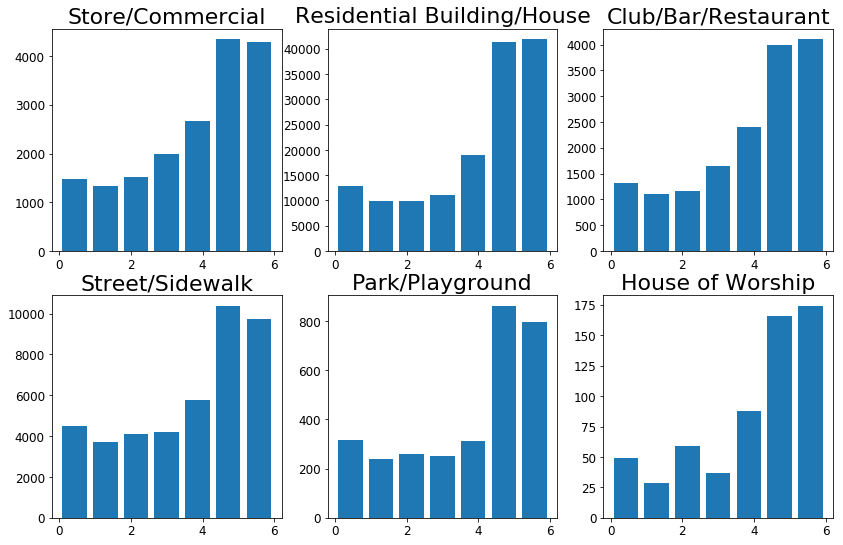

In [14]:
#Locations by weekday

fig = plt.figure()

ax1 = fig.add_subplot(2, 3, 1)
ax1.hist(store['WeekdayInt'], bins = 7, rwidth = 0.8)
ax1.set_title('Store/Commercial')
ax2 = fig.add_subplot(2, 3, 2)
ax2.hist(house['WeekdayInt'], bins = 7, rwidth = 0.8)
ax2.set_title('Residential Building/House')
ax3 = fig.add_subplot(2, 3, 3)
ax3.hist(club['WeekdayInt'], bins = 7, rwidth = 0.8)
ax3.set_title('Club/Bar/Restaurant')
ax4 = fig.add_subplot(2, 3, 4)
ax4.hist(street['WeekdayInt'], bins = 7, rwidth = 0.8)
ax4.set_title('Street/Sidewalk')
ax5 = fig.add_subplot(2, 3, 5)
ax5.hist(park['WeekdayInt'], bins = 7, rwidth = 0.8)
ax5.set_title('Park/Playground')
ax6 = fig.add_subplot(2, 3, 6)
ax6.hist(church['WeekdayInt'], bins = 7, rwidth = 0.8)
ax6.set_title('House of Worship')

plt.show()

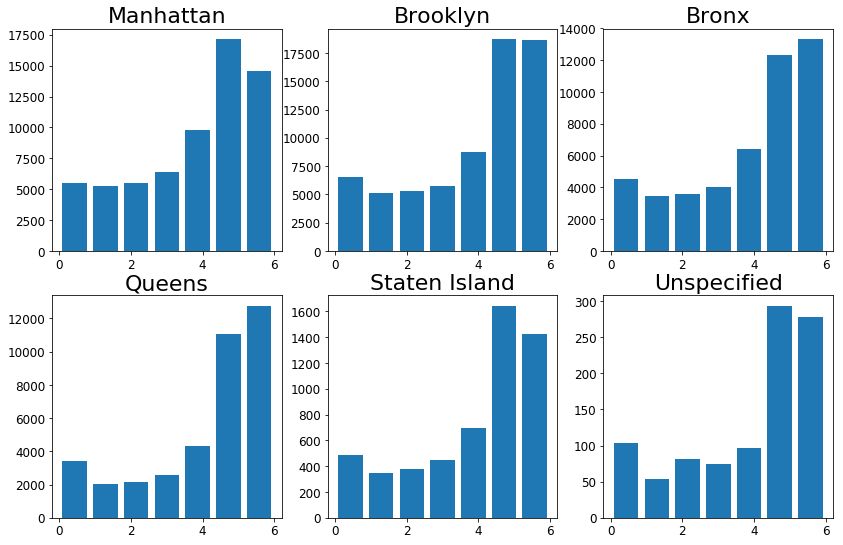

In [15]:
fig = plt.figure()

ax1 = fig.add_subplot(2, 3, 1)
ax1.hist(man['WeekdayInt'], bins = 7, rwidth = 0.8)
ax1.set_title('Manhattan')
ax2 = fig.add_subplot(2, 3, 2)
ax2.hist(bro['WeekdayInt'], bins = 7, rwidth = 0.8)
ax2.set_title('Brooklyn')
ax3 = fig.add_subplot(2, 3, 3)
ax3.hist(brx['WeekdayInt'], bins = 7, rwidth = 0.8)
ax3.set_title('Bronx')
ax4 = fig.add_subplot(2, 3, 4)
ax4.hist(que['WeekdayInt'], bins = 7, rwidth = 0.8)
ax4.set_title('Queens')
ax5 = fig.add_subplot(2, 3, 5)
ax5.hist(sta['WeekdayInt'], bins = 7, rwidth = 0.8)
ax5.set_title('Staten Island')
ax6 = fig.add_subplot(2, 3, 6)
ax6.hist(uns['WeekdayInt'], bins = 7, rwidth = 0.8)
ax6.set_title('Unspecified')

plt.show()

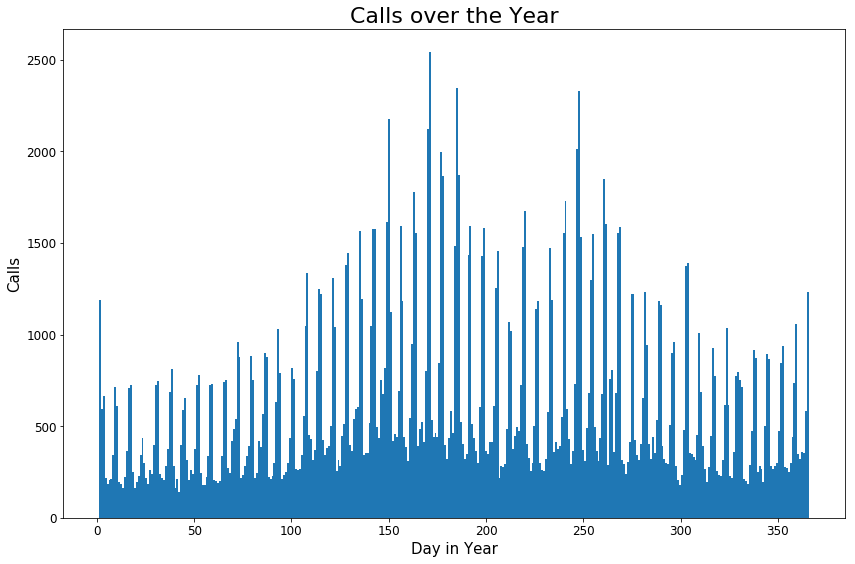

In [16]:
x,y,_ = plt.hist(calldata['YearDay'],366)
plt.xlabel('Day in Year')
plt.ylabel('Calls')
plt.title('Calls over the Year')
plt.show()

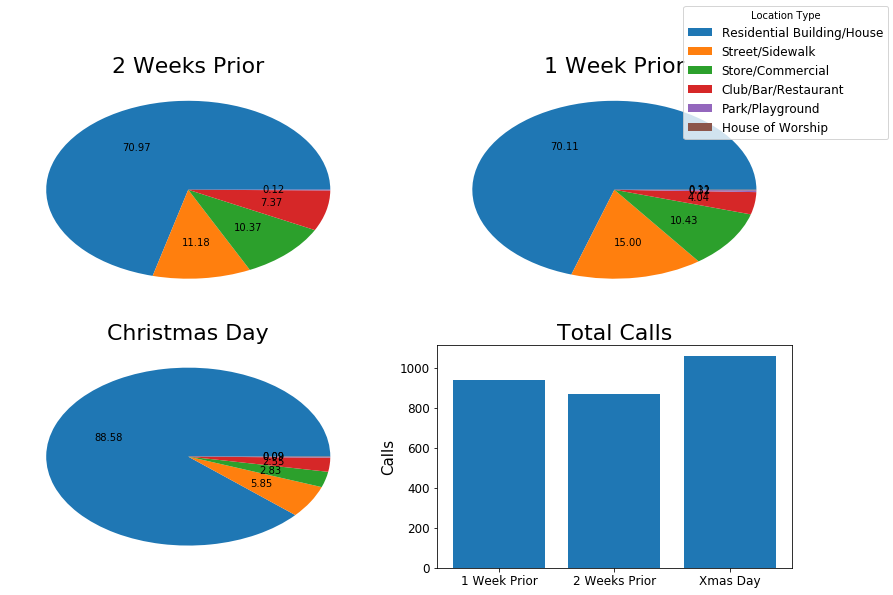

In [17]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 3)

xmasdata = calldata.loc[calldata['YearDay'] == 360]

countsXmas = xmasdata['Location Type'].value_counts()
ax1.pie(countsXmas, autopct='%.2f')
ax1.set_title('Christmas Day')
fig.legend(title="Location Type", labels=countsXmas.keys())


ax2 = fig.add_subplot(2, 2, 1)
xmasbefore2data = calldata.loc[calldata['YearDay'] == 346]

countsbefore2Xmas = xmasbefore2data['Location Type'].value_counts()

ax2.pie(countsbefore2Xmas, autopct='%.2f')
ax2.set_title('2 Weeks Prior')
# plt.legend(title="Location Type", labels=countsbeforeXmas.keys())


ax3 = fig.add_subplot(2, 2, 2)
xmasbeforedata = calldata.loc[calldata['YearDay'] == 353]

countsbeforeXmas = xmasbeforedata['Location Type'].value_counts()

ax3.pie(countsbeforeXmas, autopct='%.2f')
ax3.set_title('1 Week Prior')
# plt.legend(title="Location Type", labels=countsbeforeXmas.keys())

ax4 = fig.add_subplot(2, 2, 4)
names = ['2 Weeks Prior','1 Week Prior','Xmas Day']
amounts = [sum(countsbefore2Xmas),sum(countsbeforeXmas),sum(countsXmas)]
ax4.bar(names,amounts)
ax4.set_title('Total Calls')
ax4.set_ylabel('Calls')

plt.show()

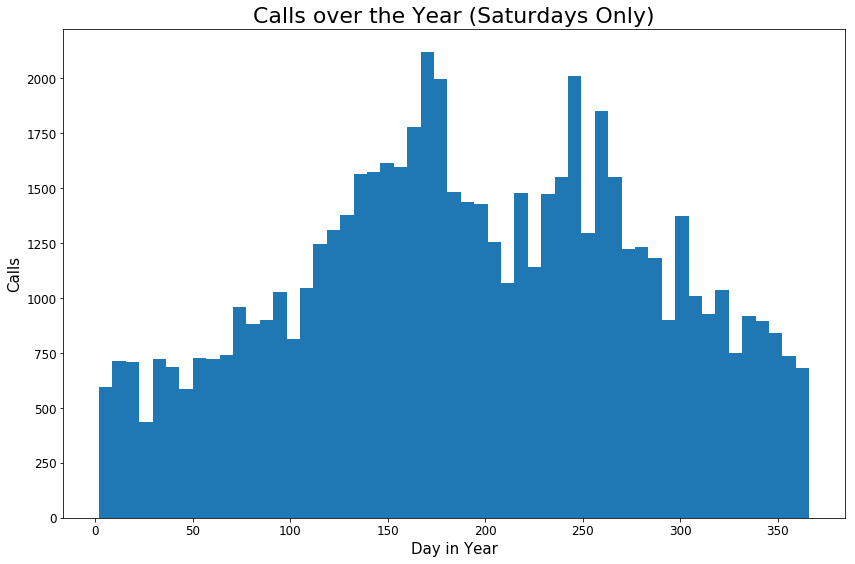

In [18]:
sat = calldata.loc[calldata['Weekday'] == 'Saturday']
plt.hist(sat['YearDay'],53)
plt.xlabel('Day in Year')
plt.ylabel('Calls')
plt.title('Calls over the Year (Saturdays Only)')
plt.show()

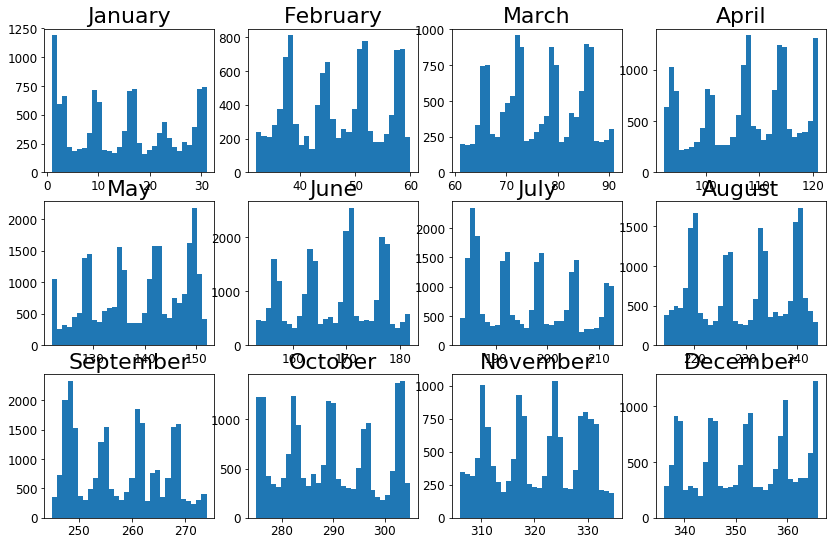

In [19]:
#By month

jan = calldata.loc[calldata['Month'] == 1]
feb = calldata.loc[calldata['Month'] == 2]
mar = calldata.loc[calldata['Month'] == 3]
apr = calldata.loc[calldata['Month'] == 4]
may = calldata.loc[calldata['Month'] == 5]
jun = calldata.loc[calldata['Month'] == 6]
jul = calldata.loc[calldata['Month'] == 7]
aug = calldata.loc[calldata['Month'] == 8]
sep = calldata.loc[calldata['Month'] == 9]
oct = calldata.loc[calldata['Month'] == 10]
nov = calldata.loc[calldata['Month'] == 11]
dec = calldata.loc[calldata['Month'] == 12]

fig = plt.figure()

ax1 = fig.add_subplot(3, 4, 1)
ax1.hist(jan['YearDay'],31)
ax1.set_title('January')
ax2 = fig.add_subplot(3, 4, 2)
ax2.hist(feb['YearDay'],29)
ax2.set_title('February')
ax3 = fig.add_subplot(3, 4, 3)
ax3.hist(mar['YearDay'],31)
ax3.set_title('March')
ax4 = fig.add_subplot(3, 4, 4)
ax4.hist(apr['YearDay'],30)
ax4.set_title('April')
ax5 = fig.add_subplot(3, 4, 5)
ax5.hist(may['YearDay'],31)
ax5.set_title('May')
ax6 = fig.add_subplot(3, 4, 6)
ax6.hist(jun['YearDay'],30)
ax6.set_title('June')
ax7 = fig.add_subplot(3, 4, 7)
ax7.hist(jul['YearDay'],31)
ax7.set_title('July')
ax8 = fig.add_subplot(3, 4, 8)
ax8.hist(aug['YearDay'],31)
ax8.set_title('August')
ax9 = fig.add_subplot(3, 4, 9)
ax9.hist(sep['YearDay'],30)
ax9.set_title('September')
ax10 = fig.add_subplot(3, 4, 10)
ax10.hist(oct['YearDay'],31)
ax10.set_title('October')
ax11 = fig.add_subplot(3, 4, 11)
ax11.hist(nov['YearDay'],30)
ax11.set_title('November')
ax12 = fig.add_subplot(3, 4, 12)
ax12.hist(dec['YearDay'],31)
ax12.set_title('December')

plt.show()

In [20]:
# try to identify specific locations by latitude/longitude
# see if the first location is repeated anywhere over the year
lat = calldata.iloc[1].Latitude
long = calldata.iloc[1].Longitude
lat0 = calldata.loc[calldata['Latitude'] == lat]
long0 = calldata.loc[calldata['Longitude'] == long]
#print(lat0.head())
#print(long0.head())
#print(lat)
#print(long)

# est. lat/long for 1: 40.8593241939, -73.9312373366

# true lat/long for 1: 40.85932419390543, -73.93123733660876
# true lat/long for 97: 40.85932419390543, -73.93123733660876
# this seems to be a fail, using google maps as lookup implies that there's just not the accuracy needed

## Scatterplot of All Calls by Location

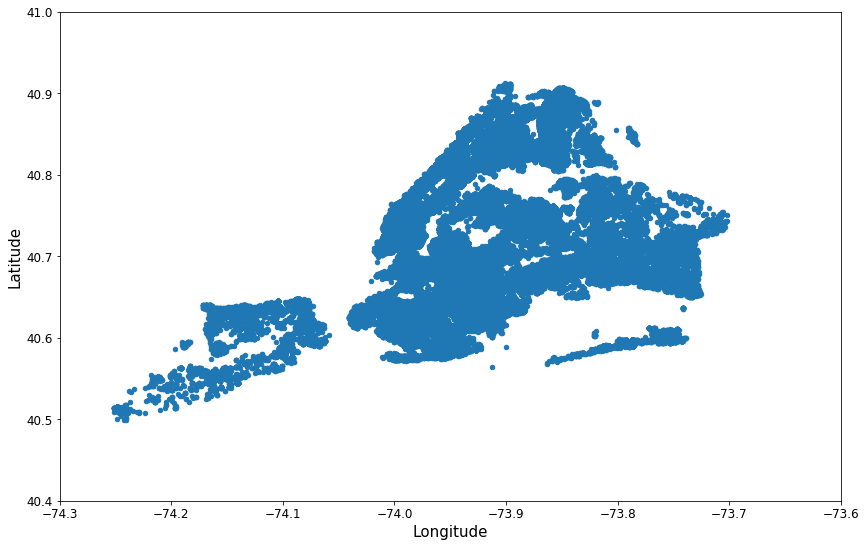

In [21]:
calldata.plot(kind = 'scatter',x='Longitude',y='Latitude',xlim = (-74.3,-73.6),ylim = (40.4,41))
plt.show()

## Density Plots of Calls by Location

In [22]:
#comment this out, it takes a long time
#sns.jointplot(x="Longitude", y="Latitude", data=calldata, kind="kde",xlim = (-74.3,-73.6),ylim = (40.4,41))

## Club/Bar/Restaurant

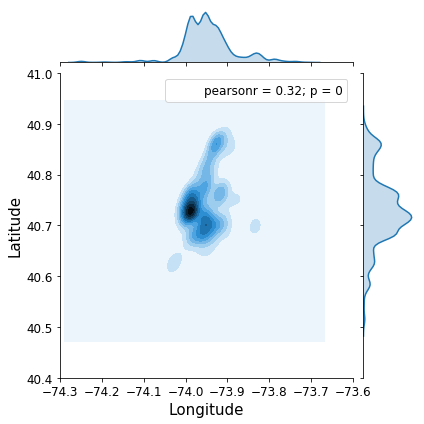

In [23]:
sns.jointplot(x="Longitude", y="Latitude", data=club, kind="kde",xlim = (-74.3,-73.6),ylim = (40.4,41))

## Store

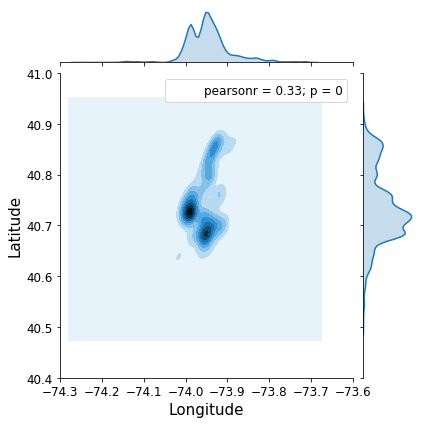

In [24]:
# making some more specific heatmaps for visualization (for powerpoint)
# did club, now try store street house park church
sns.jointplot(x="Longitude", y="Latitude", data=store, kind="kde",xlim = (-74.3,-73.6),ylim = (40.4,41))

## Street

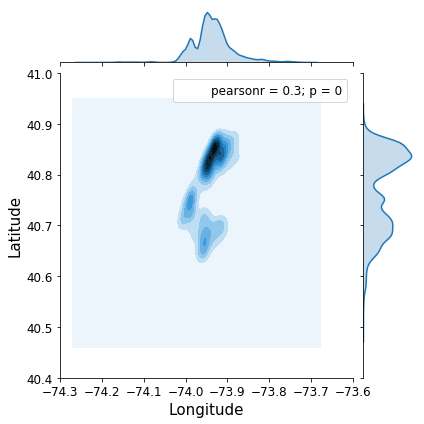

In [25]:
sns.jointplot(x="Longitude", y="Latitude", data=street, kind="kde",xlim = (-74.3,-73.6),ylim = (40.4,41))

## House

In [26]:
# house has too many entries
#sns.jointplot(x="Longitude", y="Latitude", data=house, kind="kde",xlim = (-74.3,-73.6),ylim = (40.4,41))

## Park

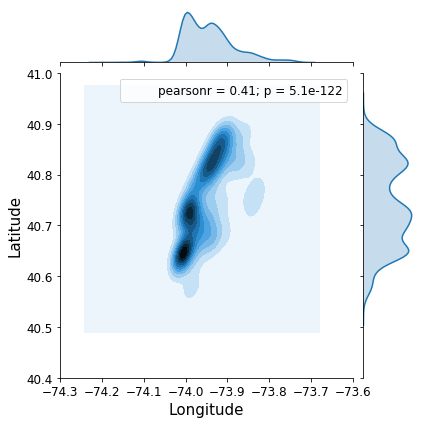

In [27]:
sns.jointplot(x="Longitude", y="Latitude", data=park, kind="kde",xlim = (-74.3,-73.6),ylim = (40.4,41))

## Church

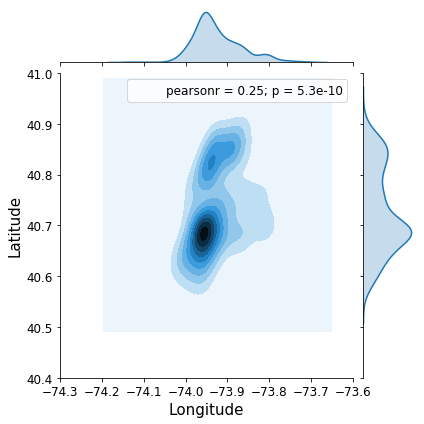

In [28]:
sns.jointplot(x="Longitude", y="Latitude", data=church, kind="kde",xlim = (-74.3,-73.6),ylim = (40.4,41))

# KNN Algorithm

In [29]:
# calldata.head()

calldata_nohouse = calldata.loc[calldata['Location Type'] != 'Residential Building/House']
calldata_nohouse.head()

,Created Date,Closed Date,Location Type,Incident Zip,City,Borough,Latitude,Longitude,Month,Day,Time,Weekday,WeekdayInt,Hour,YearDay
0,2015-12-31 00:01:15,2015-12-31 03:48:04,Store/Commercial,10034.0,NEW YORK,MANHATTAN,40.866183,-73.918930,12,31,"(00, 01, 15)",Thursday,3,0,366
1,2015-12-31 00:02:48,2015-12-31 04:36:13,Store/Commercial,10040.0,NEW YORK,MANHATTAN,40.859324,-73.931237,12,31,"(00, 02, 48)",Thursday,3,0,366
9,2015-12-31 00:14:13,2015-12-31 06:25:40,Store/Commercial,11372.0,JACKSON HEIGHTS,QUEENS,40.755584,-73.885201,12,31,"(00, 14, 13)",Thursday,3,0,366
11,2015-12-31 00:16:28,2015-12-31 00:59:23,Store/Commercial,10033.0,NEW YORK,MANHATTAN,40.847007,-73.938193,12,31,"(00, 16, 28)",Thursday,3,0,366
12,2015-12-31 00:18:04,2015-12-31 03:49:12,Store/Commercial,10034.0,NEW YORK,MANHATTAN,40.865978,-73.919531,12,31,"(00, 18, 04)",Thursday,3,0,366


In [30]:
# calldataKNN = calldata.drop(['Created Date', 'Closed Date', 'Incident Zip','City','Borough','Time','Weekday','Day'], axis=1)
# calldataKNN = calldataKNN.dropna()
# calldataKNN.head()

calldata_nohouseKNN = calldata_nohouse.drop(['Created Date', 'Closed Date', 'Incident Zip','City','Borough','Time','Weekday','Day'], axis=1)
calldata_nohouseKNN = calldata_nohouseKNN.dropna()
calldata_nohouseKNN.head()

,Location Type,Latitude,Longitude,Month,WeekdayInt,Hour,YearDay
0,Store/Commercial,40.866183,-73.918930,12,3,0,366
1,Store/Commercial,40.859324,-73.931237,12,3,0,366
9,Store/Commercial,40.755584,-73.885201,12,3,0,366
11,Store/Commercial,40.847007,-73.938193,12,3,0,366
12,Store/Commercial,40.865978,-73.919531,12,3,0,366


In [43]:
X = calldata_nohouseKNN.iloc[:,1:]
X.head()

,Latitude,Longitude,Month,WeekdayInt,Hour,YearDay
0,40.866183,-73.918930,12,3,0,366
1,40.859324,-73.931237,12,3,0,366
9,40.755584,-73.885201,12,3,0,366
11,40.847007,-73.938193,12,3,0,366
12,40.865978,-73.919531,12,3,0,366


In [40]:
y = calldata_nohouseKNN['Location Type']
y.head()

0     Store/Commercial
1     Store/Commercial
9     Store/Commercial
11    Store/Commercial
12    Store/Commercial
Name: Location Type, dtype: object

In [31]:
X = np.array(X)
y = np.array(y)

In [32]:
#  http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

KNC = KNeighborsClassifier(n_neighbors=95, weights = 'distance')

KNC.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=95, p=2,
           weights='uniform')

In [33]:
KNC.score(X_test,y_test)

0.5816410974600548

In [34]:
rlatitude = random.uniform(40.4,41)
rlongitude = random.uniform(-74.3,-73.6)
rmonth = random.randint(1,12)
rweekdayint = random.randint(0,6)
rhour = random.randint(0,23)
ryearday = random.randint(0,366)
print(rlatitude,rlongitude,rmonth,rweekdayint,rhour,ryearday)
KNC.predict([[rlatitude,rlongitude,rmonth,rweekdayint,rhour,ryearday]])

40.84590922113732 -74.16884490172237 3 1 14 193


array(['Street/Sidewalk'], dtype=object)

In [35]:
neighbors = KNC.kneighbors(X=[[rlatitude,rlongitude,rmonth,rweekdayint,rhour,ryearday]], n_neighbors=5, return_distance=False)
neighbors = neighbors[0]
for neighbor in neighbors:
    print(y_train[neighbor])
    print(X_train[neighbor])

Street/Sidewalk
[ 40.76852865 -73.98158817   7.           0.          14.
 193.        ]
Street/Sidewalk
[ 40.83680331 -73.94558599   7.           1.          14.
 194.        ]
Park/Playground
[ 40.69536317 -73.99752975   7.           0.          14.
 193.        ]
Street/Sidewalk
[ 40.84985425 -73.93977753   7.           1.          14.
 194.        ]
Store/Commercial
[ 40.75587724 -73.88242846   7.           0.          14.
 193.        ]


In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

result = []

for x in range (1,250,2):
    KNC = KNeighborsClassifier(n_neighbors=x, weights = 'distance')
    KNC.fit(X_train, y_train) 
    result.append(KNC.score(X_test,y_test))
    
print(max(result))
print(range(1,250,2)[np.argmax(result)])

0.6263925138455663
231


Text(0.5,1,'Model Accuracy with Different K Values')

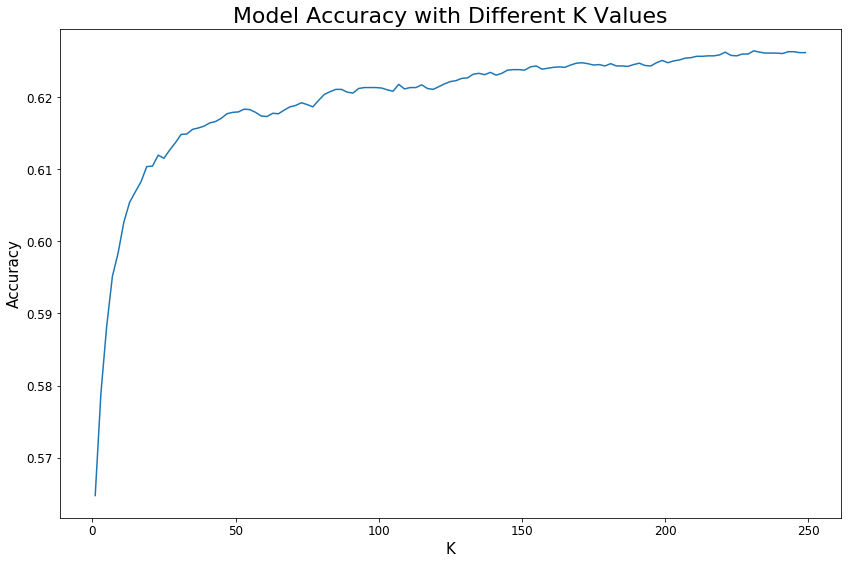

In [37]:
plt.plot(range(1,250,2),result)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Model Accuracy with Different K Values')